In [8]:
%matplotlib inline
import glob
import numpy as np
import matplotlib.pyplot as plt

all data count :  4568


([<matplotlib.patches.Wedge at 0x7f7b7876cb38>,
 [Text(0.9685936012782347, 0.5213697685547757, 'Seating'),
  Text(-0.9685935524640698, -0.5213698592410514, 'NOT Seating')],
 [Text(0.5283237825154007, 0.2843835101207867, '34.3%'),
  Text(-0.5283237558894925, -0.284383559586028, '65.7%')])

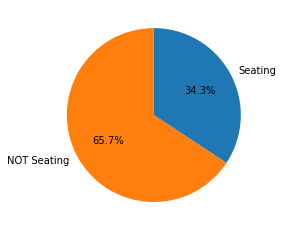

In [14]:
#file_paths = glob.glob(".\\data\\*")
file_paths = glob.glob("./data/*")
#print(file_paths)

category =np.empty((0,1), float)
rssi =np.empty((0,100), float)

for file in file_paths:
    d = np.loadtxt(file, delimiter=',')
    category_tmp, rssi_tmp = np.hsplit(d, [1])
    rssi = np.concatenate([rssi, rssi_tmp], axis=0)
    category = np.concatenate([category, category_tmp], axis=0)

all_data_count = category.shape[0]
seating_data_count = np.count_nonzero(category > 0)
print("all data count : ", all_data_count)

data_pie = [seating_data_count, all_data_count - seating_data_count]
label = ["Seating", "NOT Seating"]
plt.pie(data_pie, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")

(4568, 101)


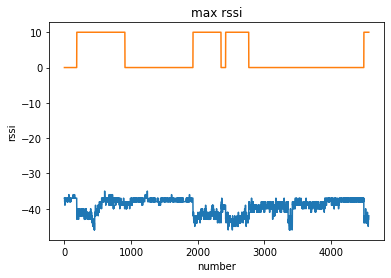

In [73]:
#file_paths = glob.glob(".\\data\\*")
file_paths = glob.glob("./data/*")

all_data = np.empty((0,101), float)

for file in file_paths:
    d = np.loadtxt(file, delimiter=',')
    all_data = np.concatenate([all_data, d], axis=0)
print(all_data.shape)

seating_data = np.empty((0,101), float)
not_seating_data = np.empty((0,101), float)
max_data = []
category_data = []
for data in all_data:
    #print(data)
    #if data[0] == 1.0:
    category_data.append(data[0]*10)
    data = np.delete(data, 0)
    max_data.append(data.max())
    

plt.plot(max_data)
plt.plot(category_data)
plt.title('max rssi')
plt.ylabel('rssi')
plt.xlabel('number')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()